# Лабораторная работа №1.2

Импорт библиотек:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Загрузка набора данных diabetes
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## 1. Исследование данных

In [23]:
# Преобразуем данные в DataFrame для удобства анализа
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Выведем основную информацию о данных
print("\nИнформация о данных:")
print(df.info())

# Выведем основные статистические характеристики
print("\nОсновные статистические характеристики:")
print(df.describe())

# Посмотрим корреляцию признаков с целевой переменной
print("\nКорреляция с целевой переменной:")
print(df.corr()['target'].sort_values(ascending=False))


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Основные статистические характеристики:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.76

## 2. Подготовка данных

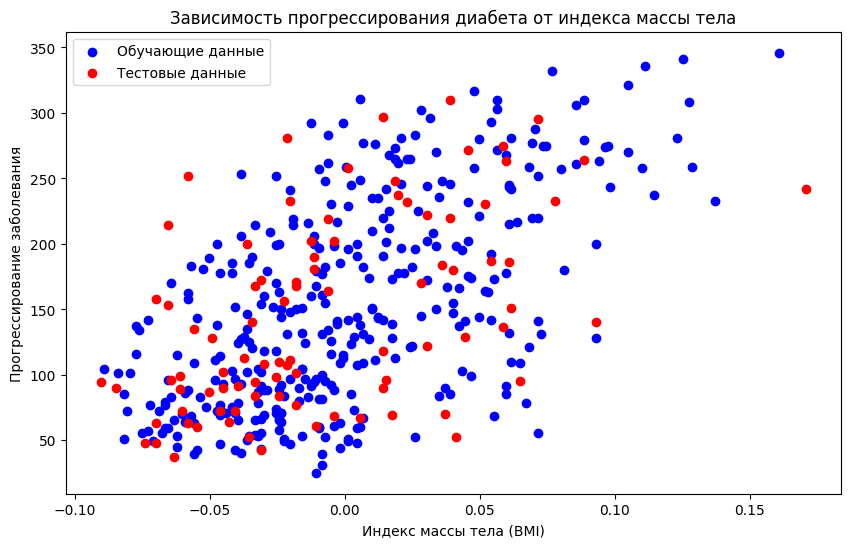

In [26]:
# Выбираем признак bmi и целевую переменную
X = df[['bmi']].values
y = df['target'].values

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Прогрессирование заболевания')
plt.title('Зависимость прогрессирования диабета от индекса массы тела')
plt.legend()
plt.show()

## 3. Линейная регрессия с помощью Scikit-Learn


Результаты Scikit-Learn линейной регрессии:
Коэффициент (угловой коэффициент): 998.5777
Интерсепт (свободный член): 152.0034


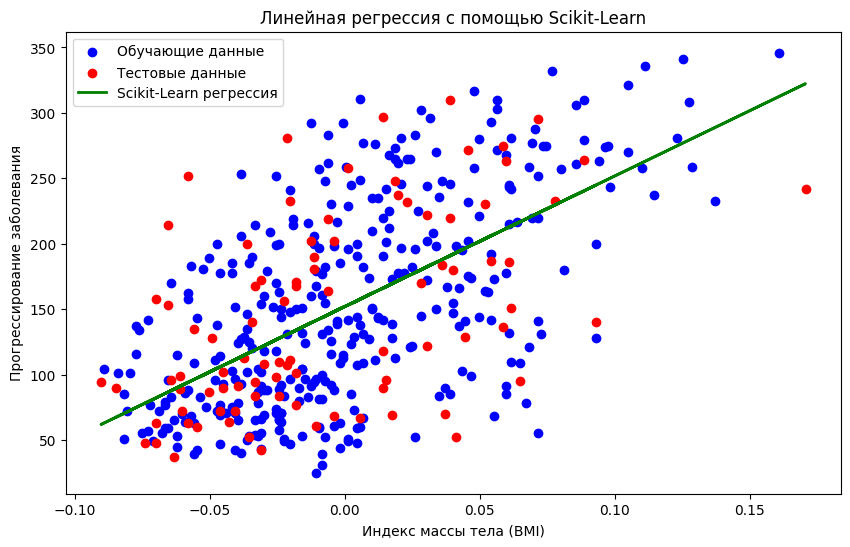

In [29]:
# Создаем и обучаем модель
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Получаем коэффициенты
sklearn_intercept = sklearn_model.intercept_
sklearn_coef = sklearn_model.coef_[0]

print("\nРезультаты Scikit-Learn линейной регрессии:")
print(f"Коэффициент (угловой коэффициент): {sklearn_coef:.4f}")
print(f"Интерсепт (свободный член): {sklearn_intercept:.4f}")

# Предсказания на тестовых данных
y_pred_sklearn = sklearn_model.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_test, y_pred_sklearn, color='green', linewidth=2, label='Scikit-Learn регрессия')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Прогрессирование заболевания')
plt.title('Линейная регрессия с помощью Scikit-Learn')
plt.legend()
plt.show()

## 4. Собственная реализация линейной регрессии


Результаты собственной реализации линейной регрессии:
Коэффициент (угловой коэффициент): 998.5777
Интерсепт (свободный член): 152.0034


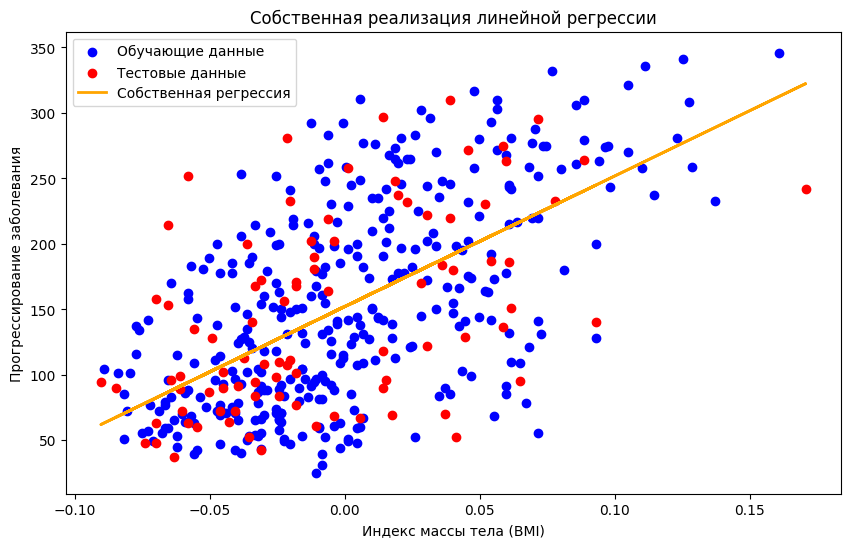

In [32]:
class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        # Добавляем столбец единиц для intercept
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        
        # Вычисляем коэффициенты по нормальному уравнению
        theta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)
        
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
    
    def predict(self, X):
        return self.intercept_ + X.dot(self.coef_)

# Создаем и обучаем собственную модель
my_model = MyLinearRegression()
my_model.fit(X_train, y_train)

# Получаем коэффициенты
my_intercept = my_model.intercept_
my_coef = my_model.coef_[0]

print("\nРезультаты собственной реализации линейной регрессии:")
print(f"Коэффициент (угловой коэффициент): {my_coef:.4f}")
print(f"Интерсепт (свободный член): {my_intercept:.4f}")

# Предсказания на тестовых данных
y_pred_my = my_model.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_test, y_pred_my, color='orange', linewidth=2, label='Собственная регрессия')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Прогрессирование заболевания')
plt.title('Собственная реализация линейной регрессии')
plt.legend()
plt.show()

## 5. Сравнение результатов


Сравнение коэффициентов:
Параметр        Scikit-Learn    Собственная    
Интерсепт       152.0034        152.0034       
Коэффициент     998.5777        998.5777       

Таблица с результатами предсказаний:
      BMI  Фактическое значение  Scikit-Learn предсказание  Собственное предсказание  Разница Scikit-Learn  Разница собственная
-0.006206                 219.0                 145.806227                145.806227             73.193773            73.193773
 0.036907                  70.0                 188.857390                188.857390           -118.857390          -118.857390
-0.004050                 202.0                 147.958785                147.958785             54.041215            54.041215
 0.051996                 230.0                 203.925298                203.925298             26.074702            26.074702
-0.020218                 111.0                 131.814599                131.814599            -20.814599           -20.814599
-0.024529               

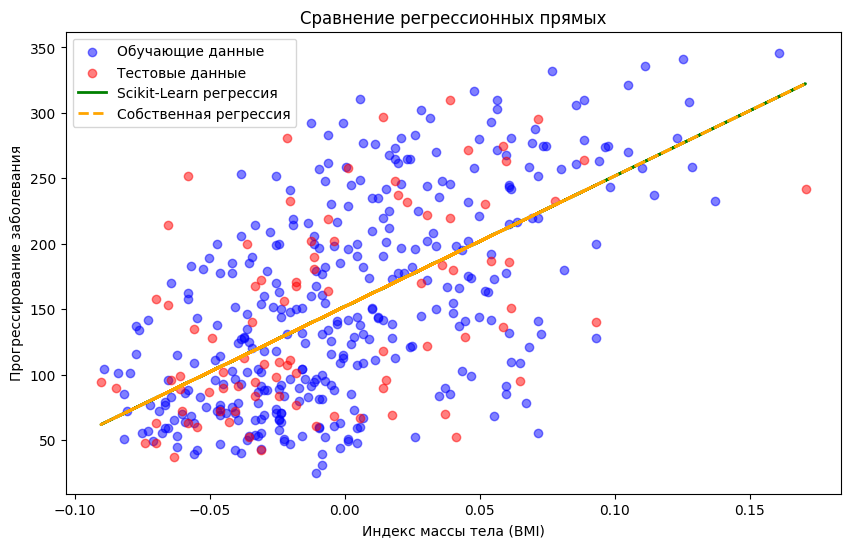

In [35]:
# Сравнение коэффициентов
print("\nСравнение коэффициентов:")
print(f"{'Параметр':<15} {'Scikit-Learn':<15} {'Собственная':<15}")
print(f"{'Интерсепт':<15} {sklearn_intercept:<15.4f} {my_intercept:<15.4f}")
print(f"{'Коэффициент':<15} {sklearn_coef:<15.4f} {my_coef:<15.4f}")

# Создаем таблицу с результатами предсказаний
results = pd.DataFrame({
    'BMI': X_test.flatten(),
    'Фактическое значение': y_test,
    'Scikit-Learn предсказание': y_pred_sklearn,
    'Собственное предсказание': y_pred_my,
    'Разница Scikit-Learn': y_test - y_pred_sklearn,
    'Разница собственная': y_test - y_pred_my
})

print("\nТаблица с результатами предсказаний:")
print(results.head(10).to_string(index=False))

# Визуализация обеих регрессионных прямых
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Тестовые данные')
plt.plot(X_test, y_pred_sklearn, color='green', linewidth=2, label='Scikit-Learn регрессия')
plt.plot(X_test, y_pred_my, color='orange', linewidth=2, linestyle='--', label='Собственная регрессия')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Прогрессирование заболевания')
plt.title('Сравнение регрессионных прямых')
plt.legend()
plt.show()